In [5]:
import sys
sys.path.append('..')
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import time
import util, template, optimize
import matplotlib.pyplot as plt
from tomo1D import blur as blur

In [6]:
## helper functions
iden = sps.eye     # usage: iden(n) for dimension n

def scipy_sparse_to_spmatrix(A):
    """
    Takes scipy sparse matrix to a cvxopt spmatrix
    """
    coo = A.tocoo()
    SP = spmatrix(coo.data.tolist(), coo.row.tolist(), coo.col.tolist(), size=A.shape)
    return SP


# small scale problems
---

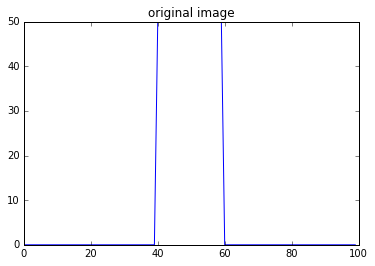

In [7]:
## setup problem
# dimensions
n = 100  # number of pixels in image space
m = n    # number of pixels in data space
k = 100  # number of pixels in ROI

# sparsity and regularization
sparse = True
B = iden(n)
lam = 1

# gaussian blur parameters
sigma = 3
t = 10

# load 1D image
fname = '../tomo1D/f_impulse_100.npy'
f = np.load(fname)

plt.plot(f)
plt.title("original image")
plt.show()

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')


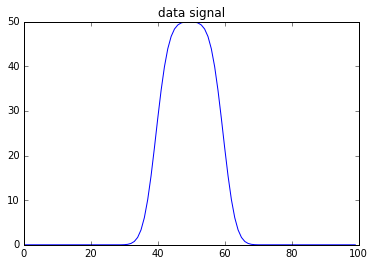

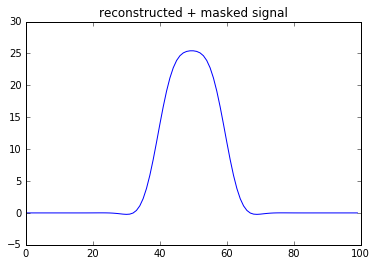

In [8]:
## generate problem
# generate instance
K_diag = 1.*np.ones(m)
Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)
print(Kb.shape, "Kb")
print(X.shape, "X")
print(M.shape, "M")

# compute reconstruction
R = template.direct_rxn(X=X, lam=lam, B=B, sparse=sparse)

# compute blurred image (data signal)
sb = X.dot(f)

plt.plot(sb)
plt.title("data signal")
plt.show()

# compute reconstructed / masked image (rxn signal)
sx = M.dot(R).dot(sb)

plt.plot(sx)
plt.title("reconstructed + masked signal")
plt.show()


((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


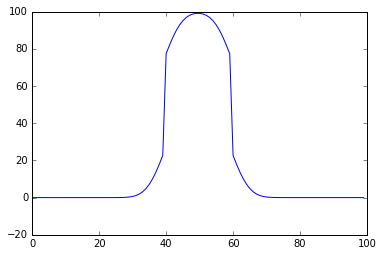

In [9]:
## solve problem
w, Kx, sx = util.direct_solve(Kb=Kb, R=R, M=M, lam=lam, B=B, sb=sb, sparse=True)
print(Kx.shape, "Kx")
plt.plot(w)
plt.show()

## testing $K_b$ and $\lambda$

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')
((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


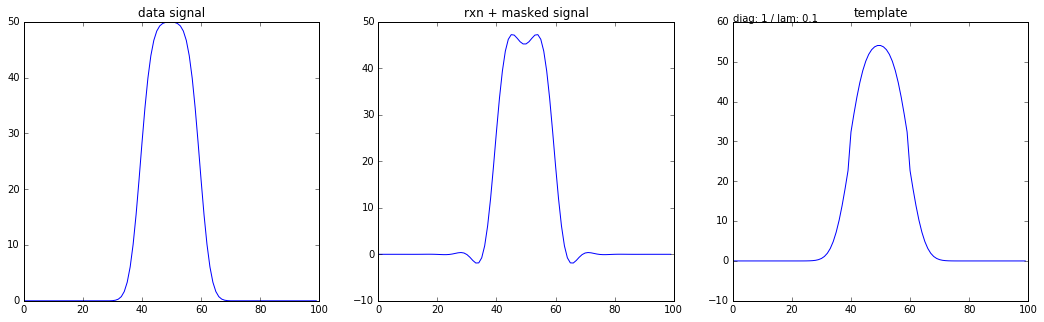

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


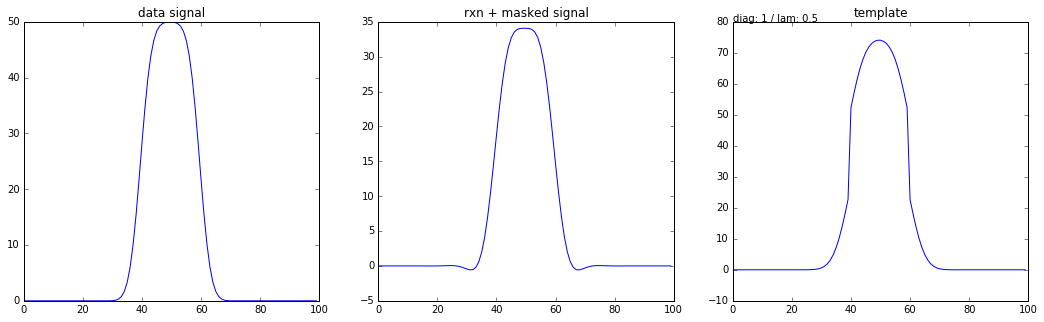

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


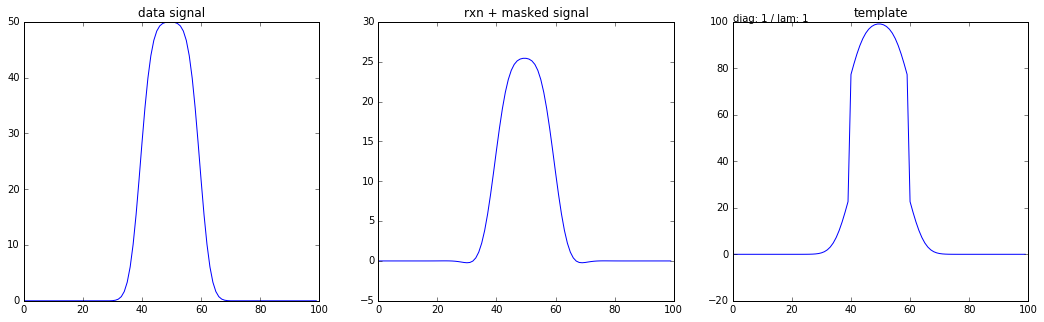

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


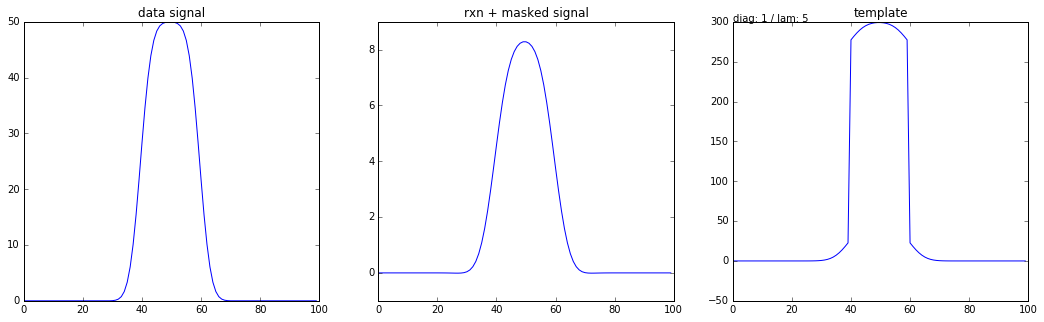

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


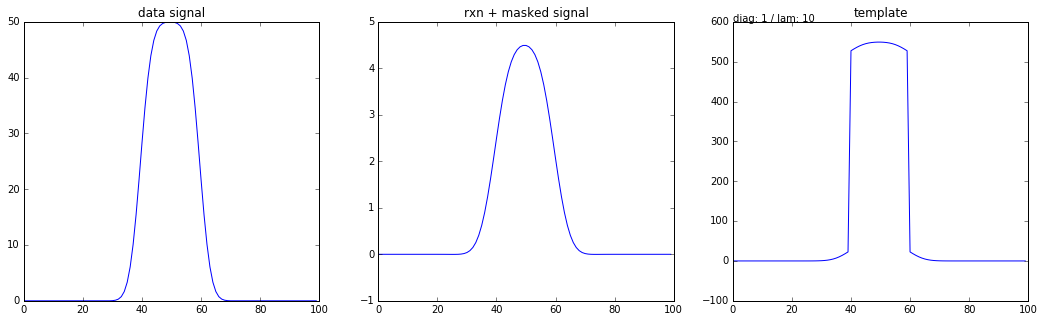

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


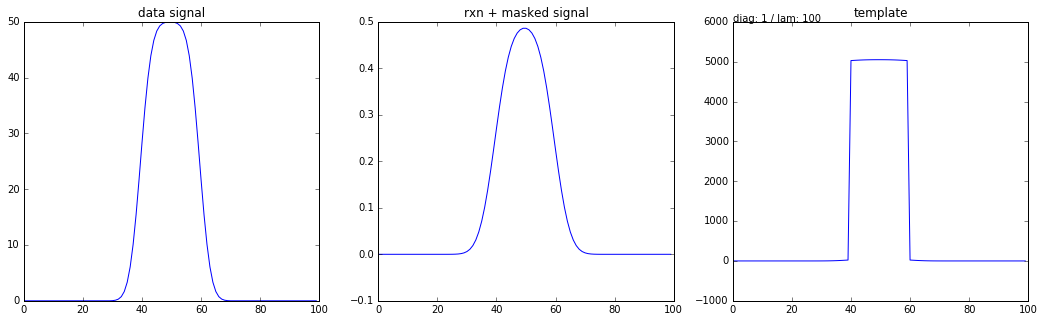

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


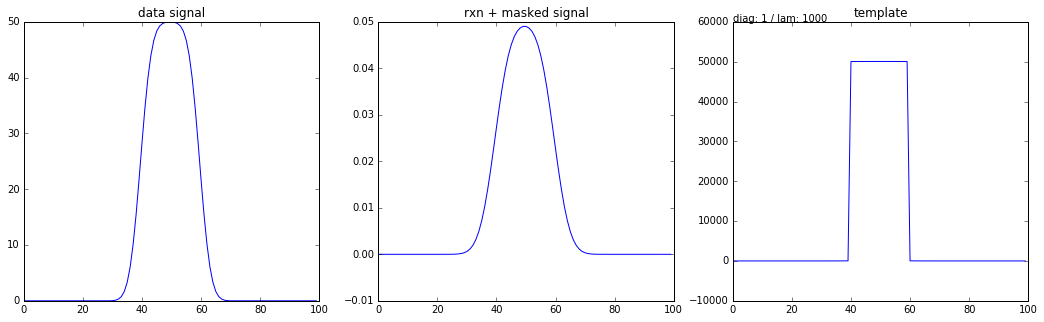

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')
((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


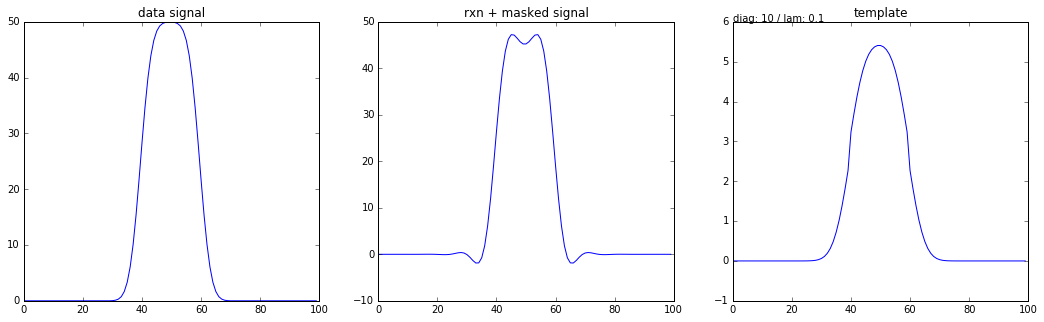

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


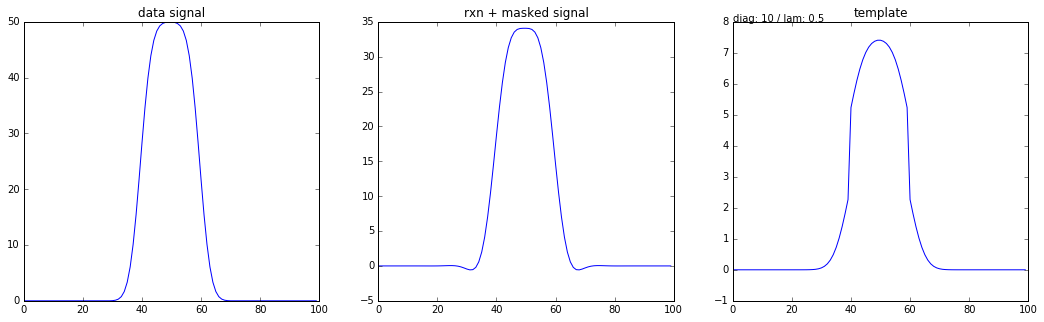

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


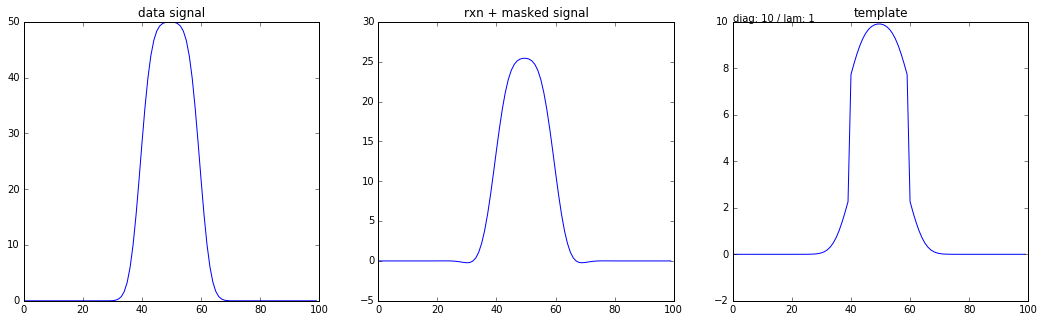

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


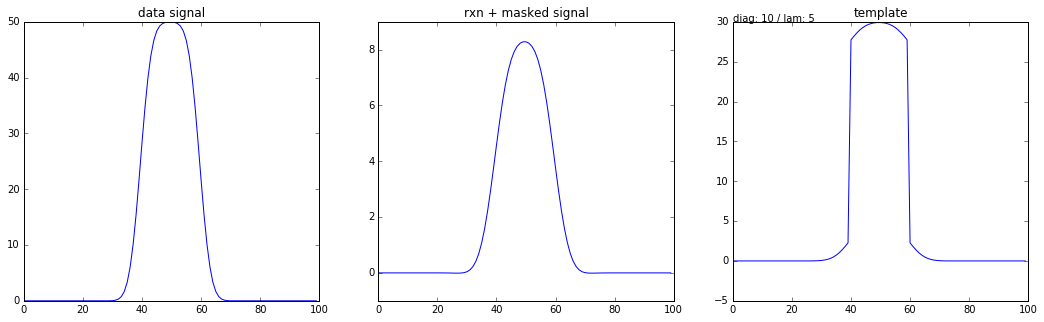

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


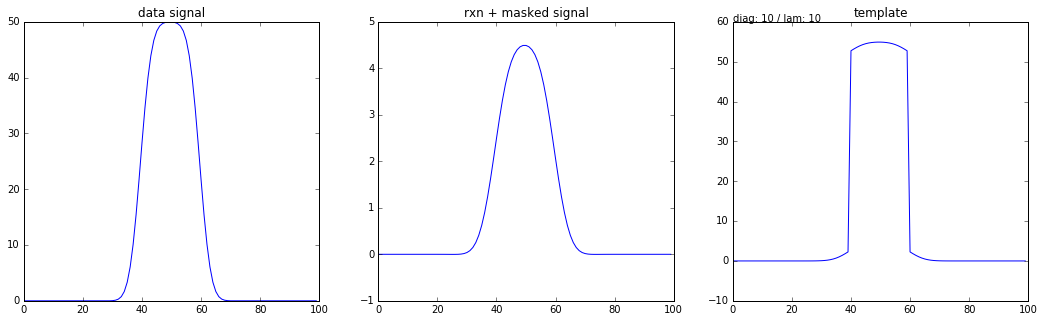

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


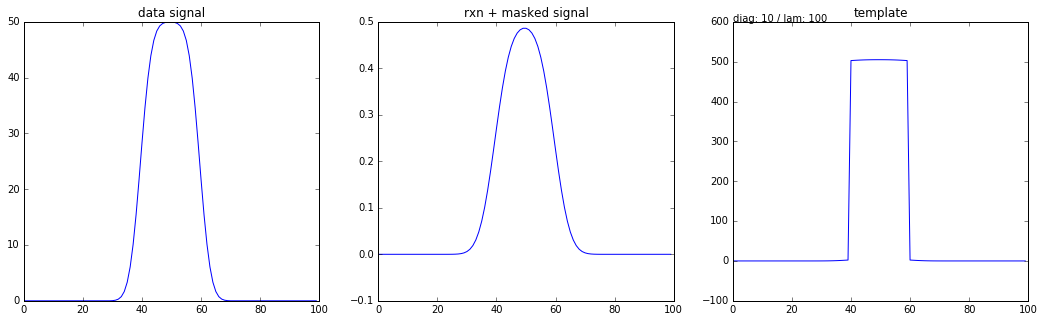

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


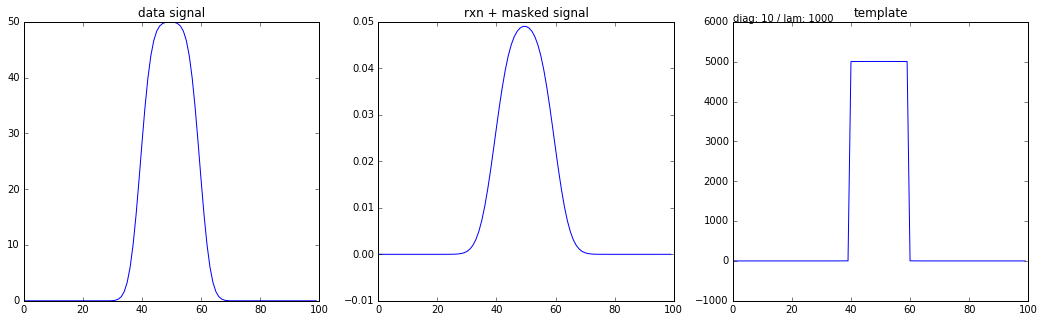

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')
((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


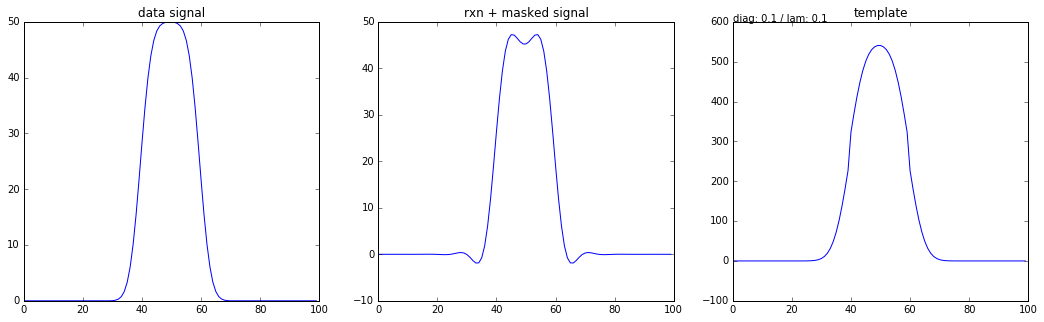

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


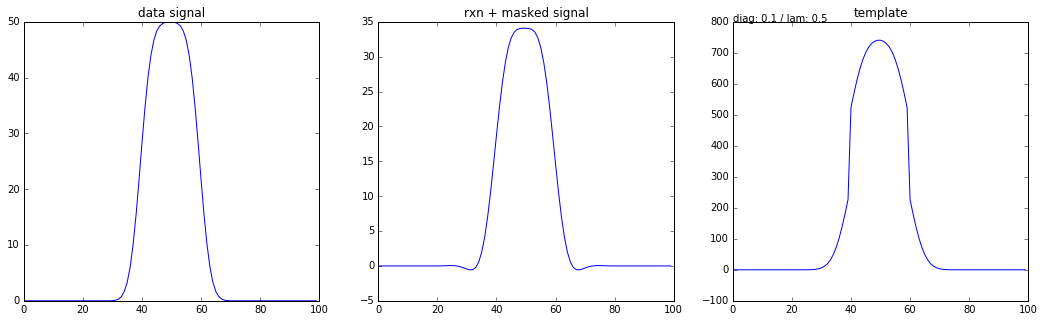

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


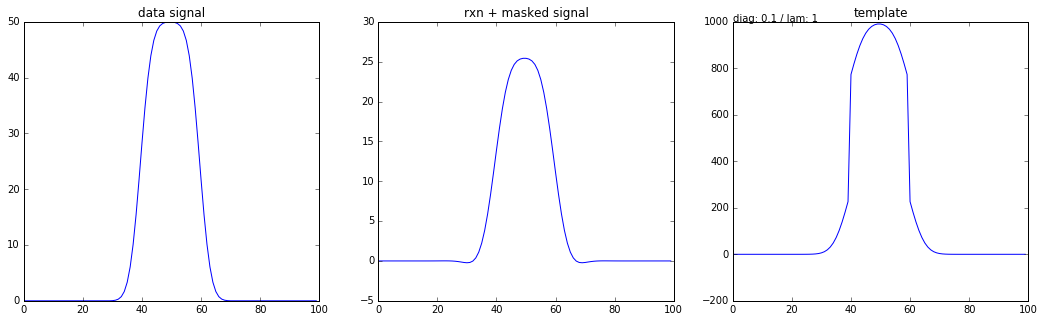

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


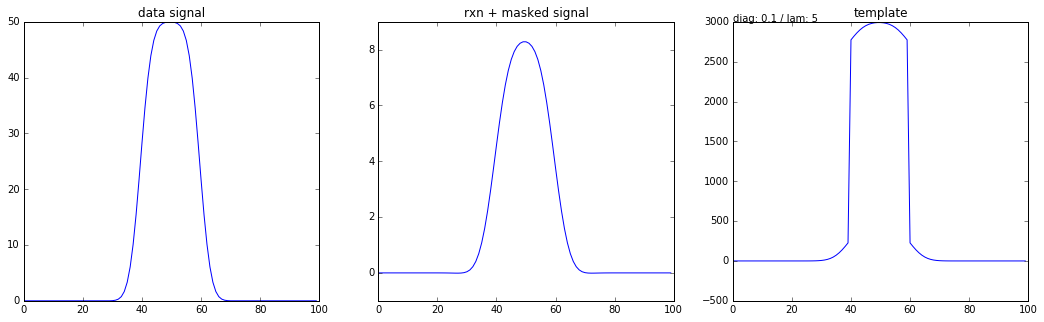

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


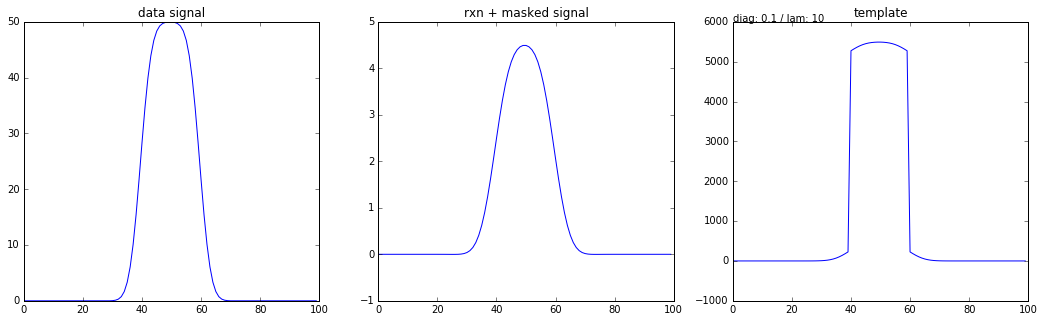

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


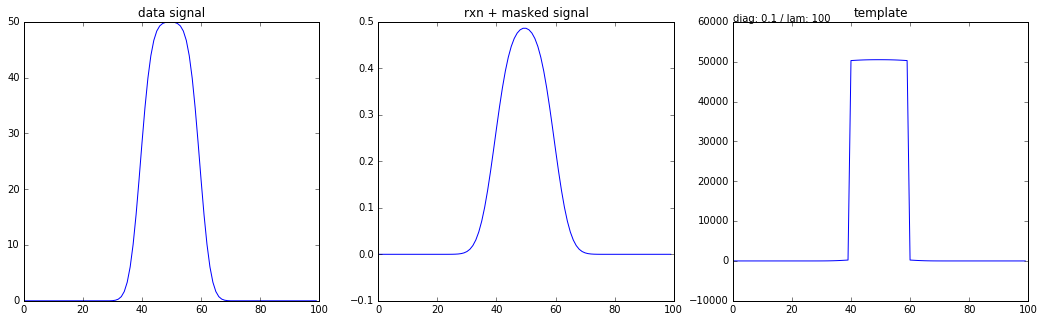

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


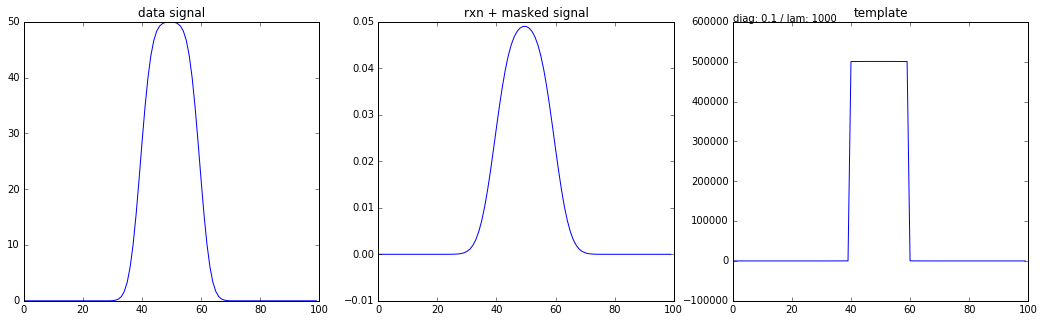

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')
((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


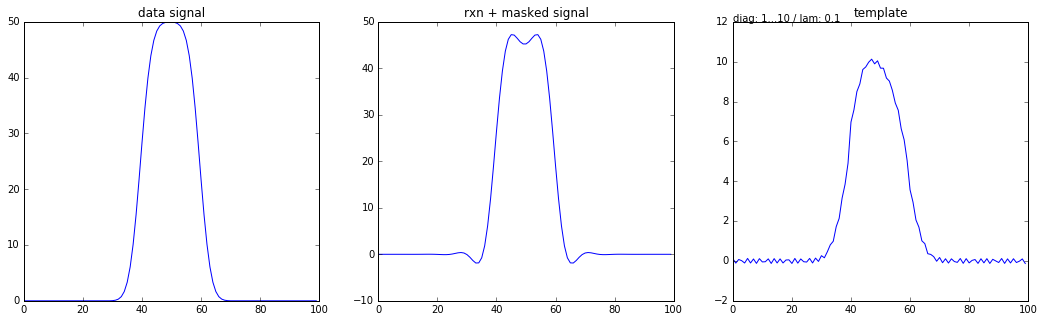

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


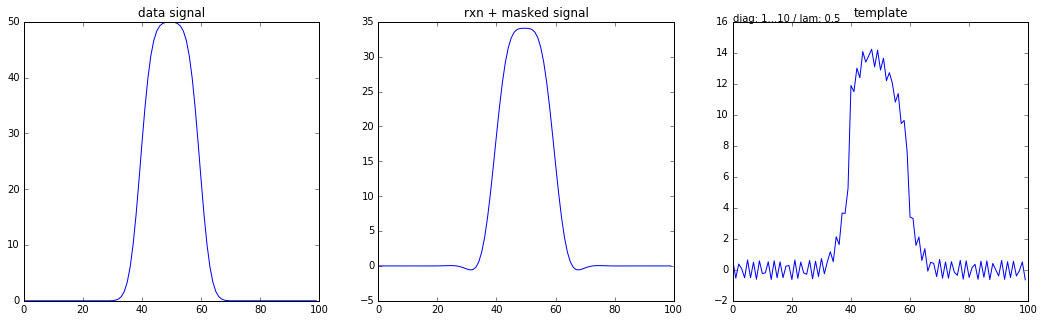

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


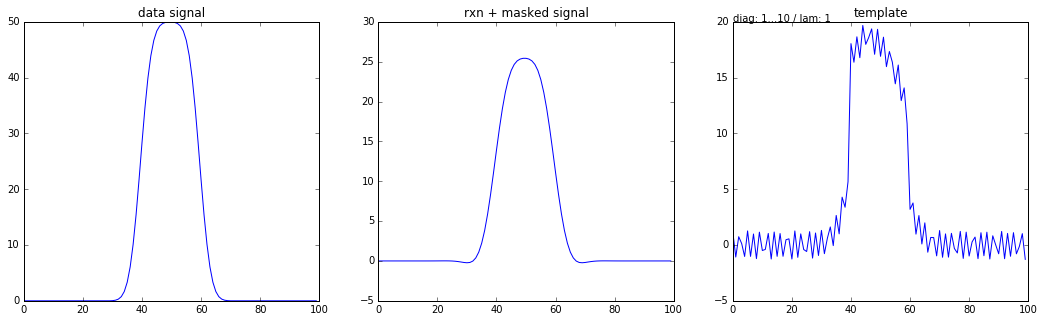

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


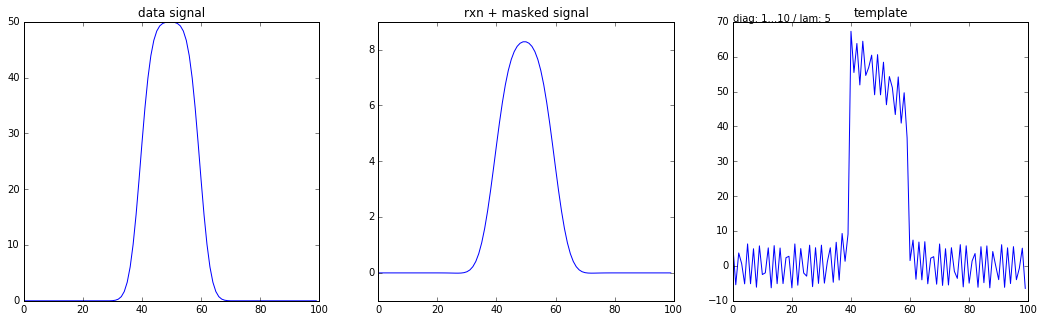

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


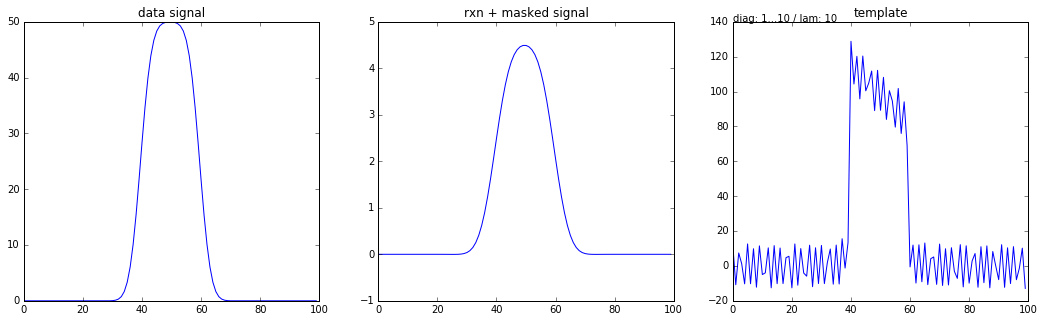

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


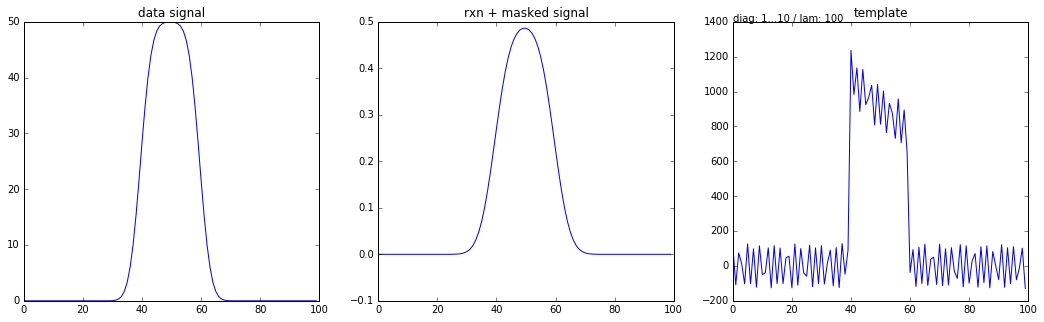

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


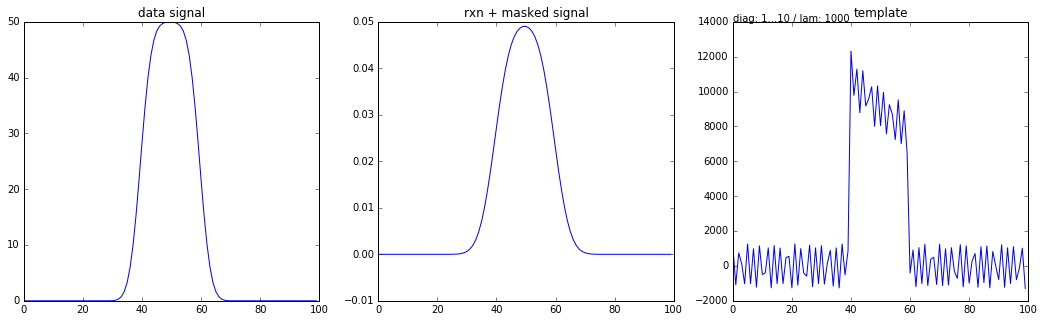

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')
((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


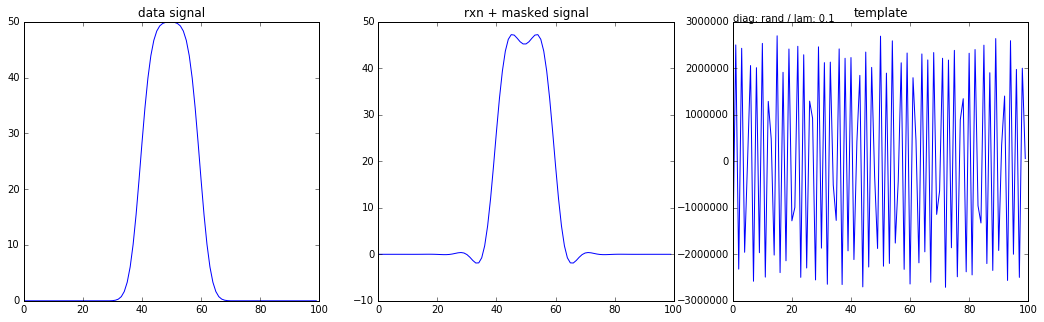

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


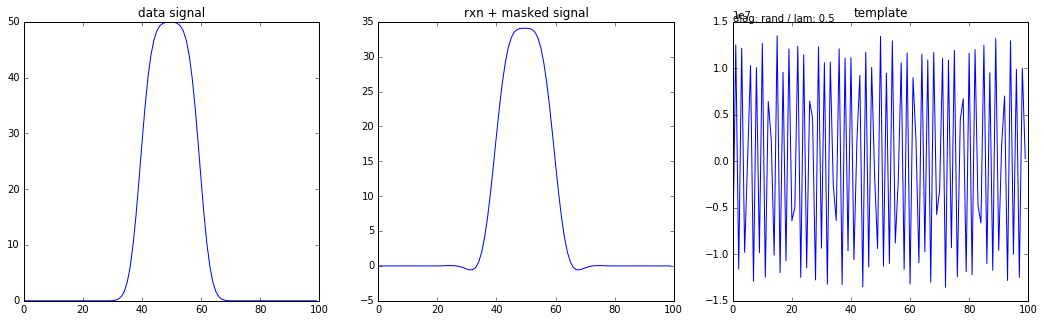

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


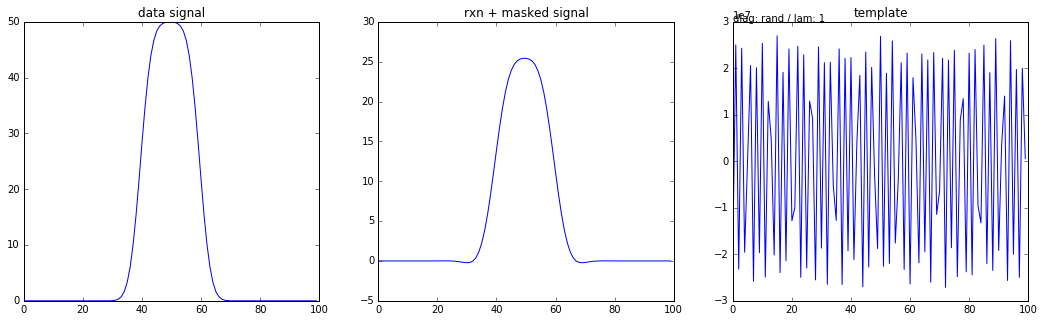

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


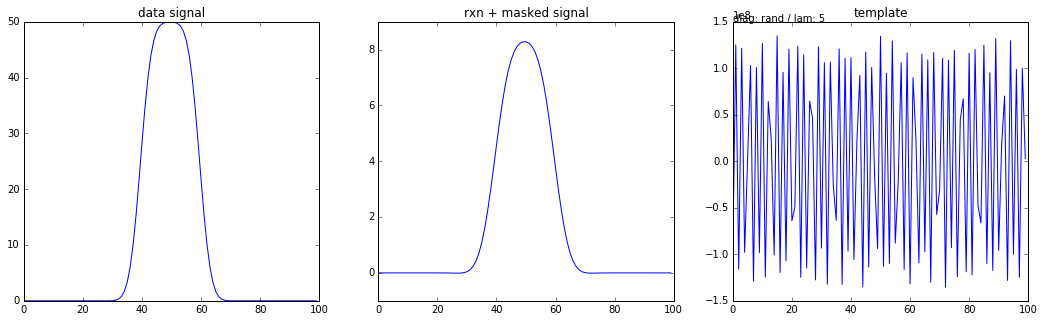

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


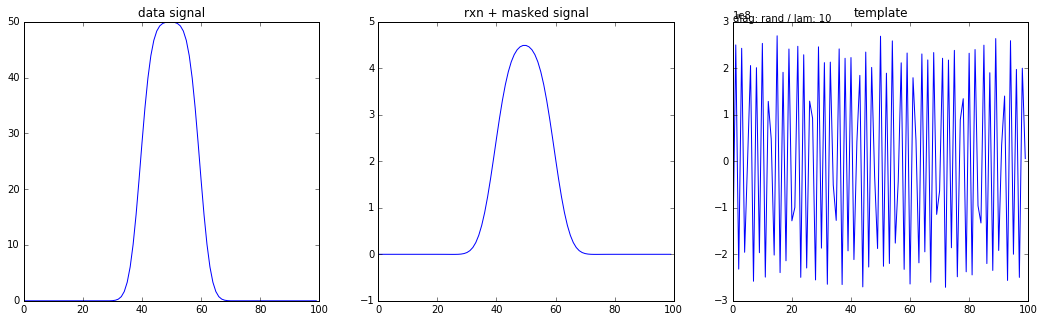

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


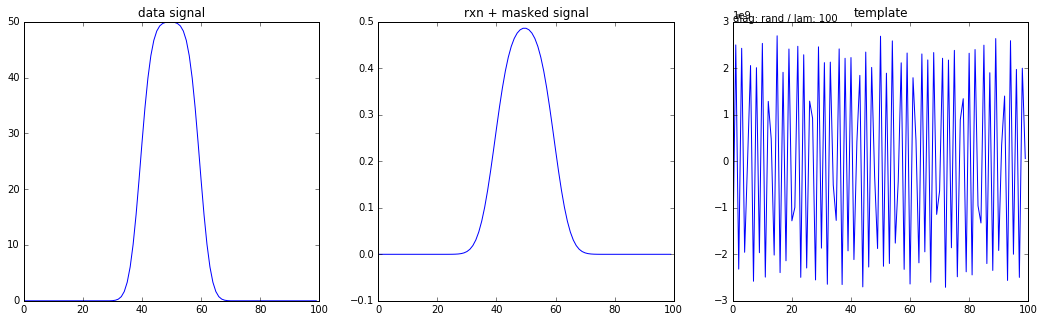

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


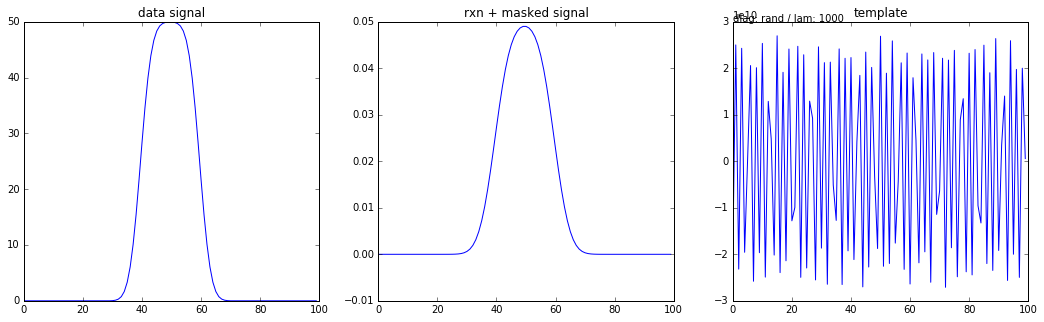

In [10]:
## testing Kb & lam
K_diag = [1.*np.ones(m), 10.*np.ones(m), 1/10.*np.ones(m), np.linspace(1,10,m), abs(np.random.randn(m))]
K_name = ["1", "10", "0.1", "1...10", "rand"]
lam = [0.1, 0.5, 1, 5, 10, 100, 1000]


for K,Kn in zip(K_diag,K_name):
    
    # generate problem
    Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K, sigma=sigma, t=t, sparse=sparse)
    print(Kb.shape, "Kb")
    print(X.shape, "X")
    print(M.shape, "M")

    # compute reconstruction
    for l in lam:

        R = util.direct_rxn(X=X, lam=l, B=B, sparse=sparse)

        # compute blurred image (data signal)
        sb = X.dot(f)

        fig = plt.figure(figsize=(18,5))
        ax1 = fig.add_subplot(1,3,1)
        plt.plot(sb)        
        ax1.title.set_text("data signal")

        # compute reconstructed / masked image (rxn signal)
        sx = M.dot(R).dot(sb)

        ax2 = fig.add_subplot(1,3,2)
        plt.plot(sx)
        ax2.title.set_text("rxn + masked signal")

        w, Kx, sx = util.direct_solve(Kb=Kb, R=R, M=M, lam=lam, B=B, sb=sb, sparse=True)
        print(Kx.shape, "Kx")
        ax3 = fig.add_subplot(1,3,3)
        ax3.title.set_text("template")
        plt.plot(w)
        txt = "diag: "+str(Kn)+" / "+"lam: "+str(l)
        plt.text(0,1,txt,transform = ax3.transAxes)
        plt.show()



##### reconstructed signal
- lambda
    - for larger regularization, the signal shape stabilizes and the magnitude shrinks
    - for smaller regularization, the rxn+masked signal has less stability

- Kb
    - reconstructed signal independent of Kb diagonal entries (no Kb in reconstruction formulation)

##### template
- lambda
    - for larger regularization, the template looks closer to the original signal for constant Kb
    - for smaller regularization the template is "less aggressive" and captures less of the sharpness of the original impulse
    - template magnitude scales with regularization magnitude

- Kb
    - not much of a difference in template shape when comparing constant larger diagonal entries and constant smaller diagonal entries
    - significant difference in template shape when comparing nonconstant diagonal entries
    - for diagonal entries ranging from 1 to 10, we see the template cheating away from the sharp corner on the right (which is where the greater variability in pixels is)
    - for random diagonal entries, the template loses most (all) observable structure

## testing $M$ and $\lambda$

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')
((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


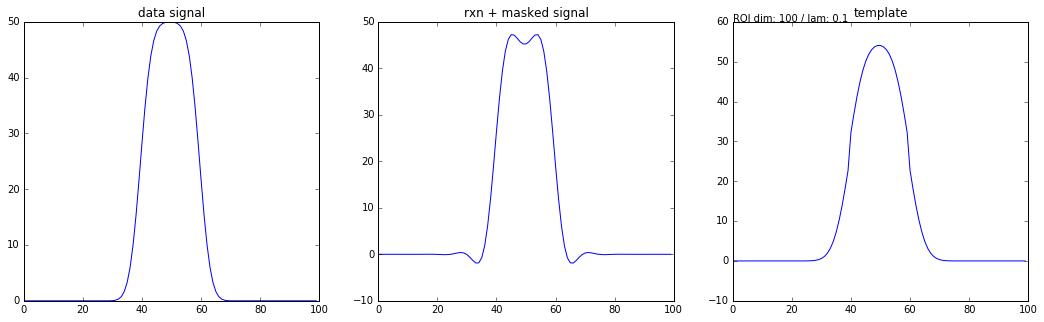

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


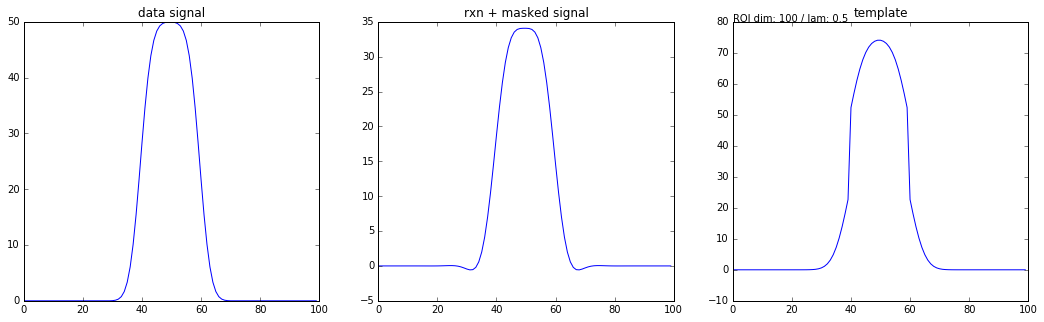

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


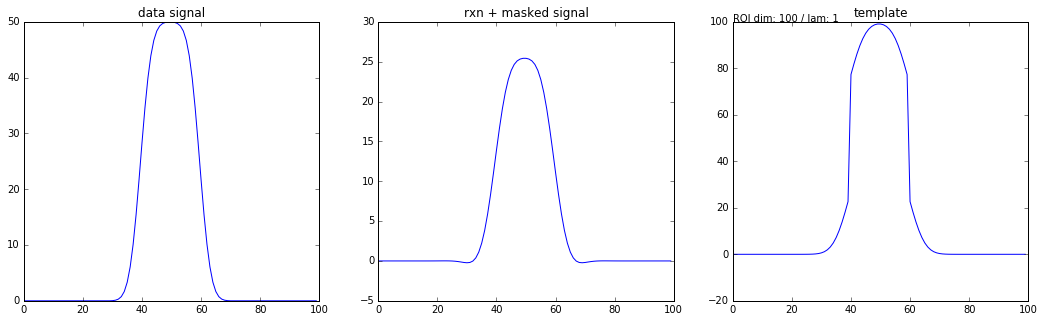

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


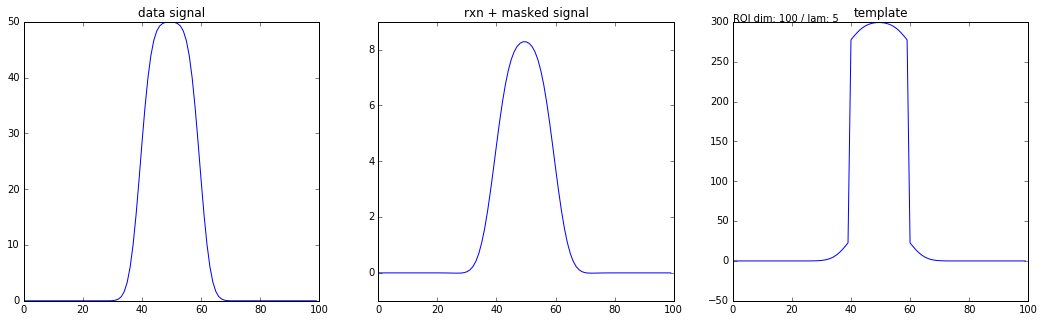

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


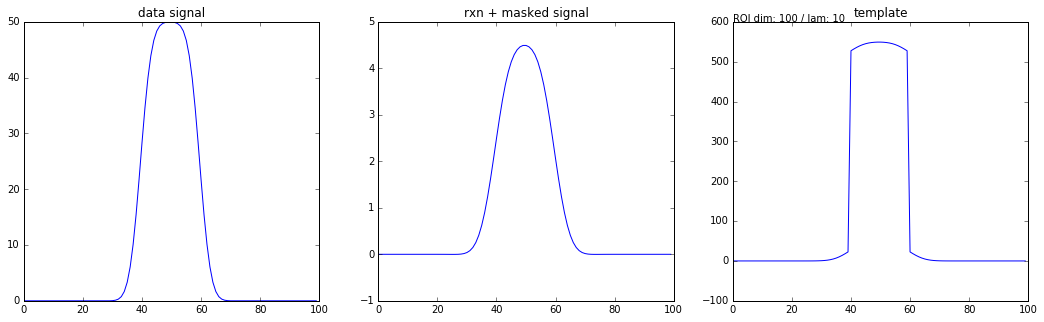

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


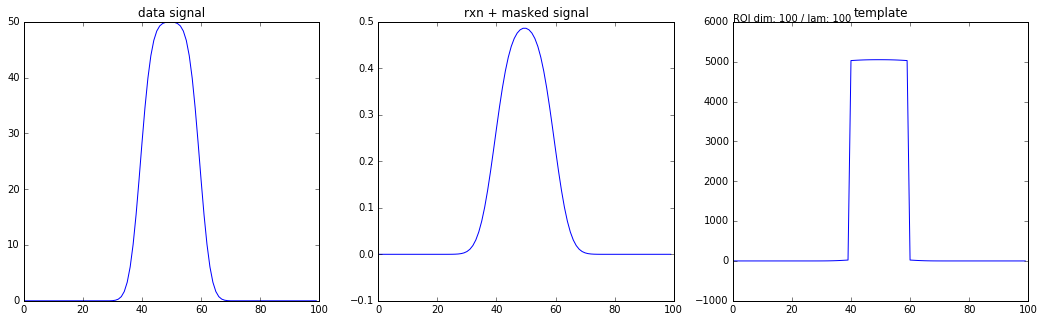

((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


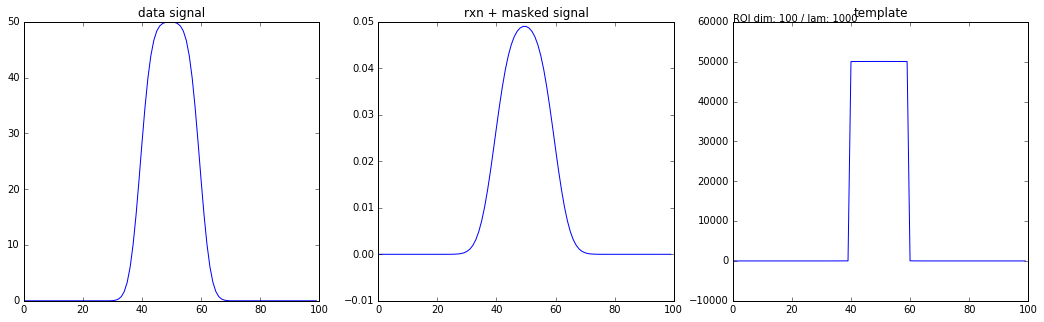

((100, 100), 'Kb')
((100, 100), 'X')
((80, 100), 'M')
((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


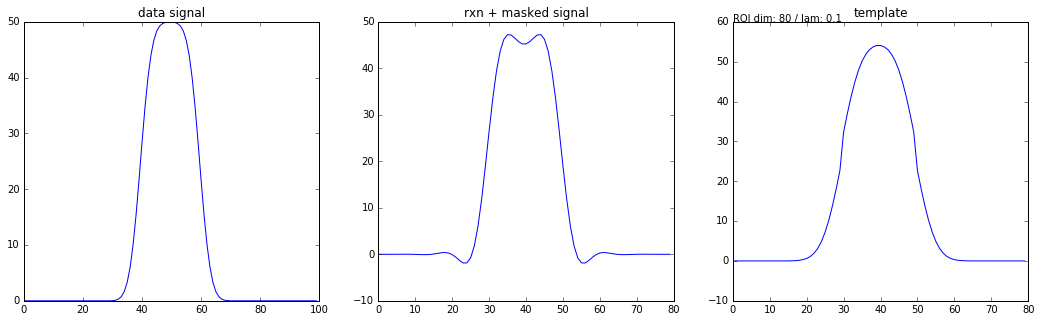

((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


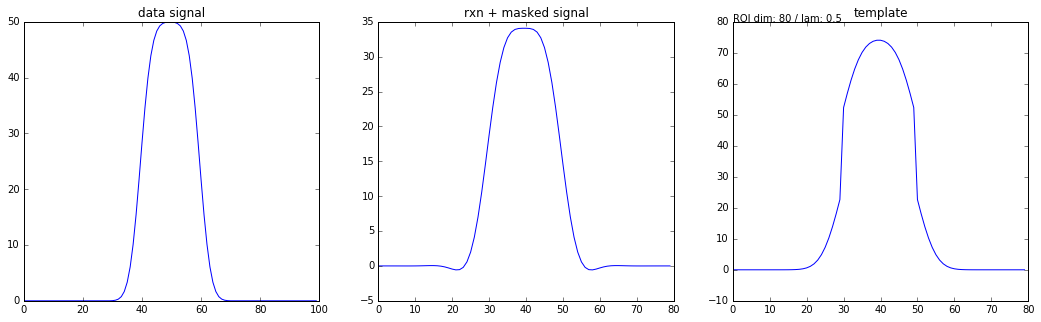

((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


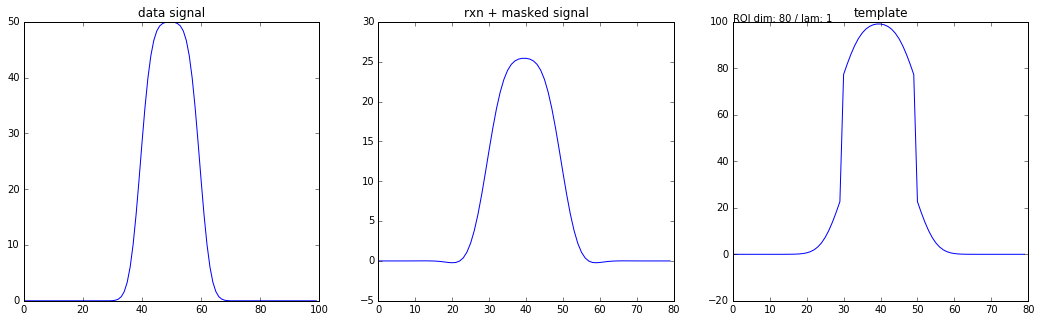

((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


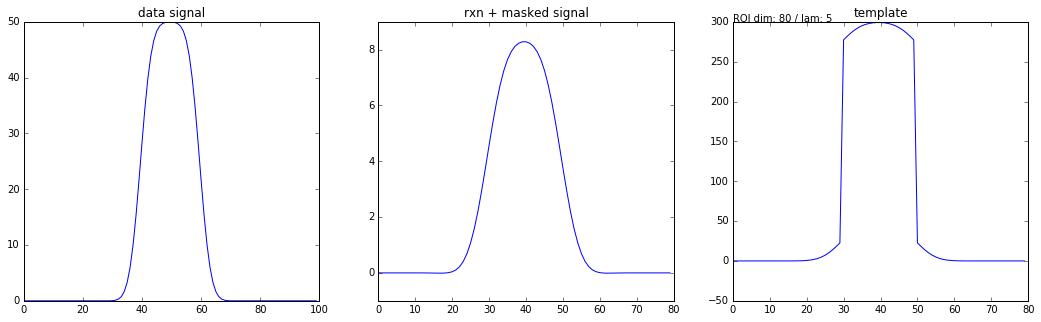

((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


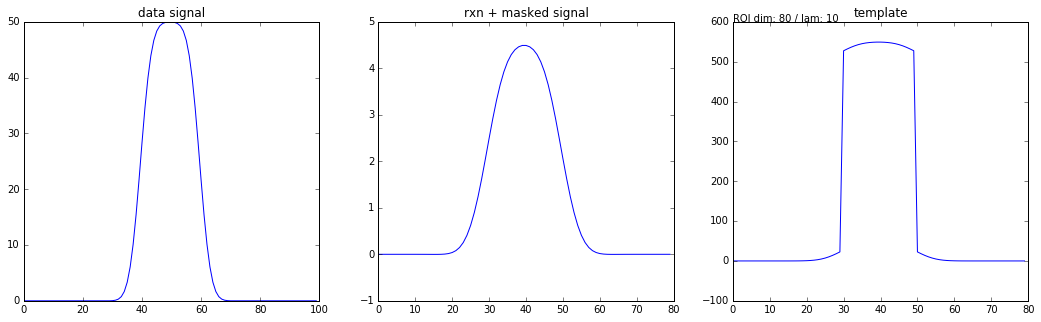

((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


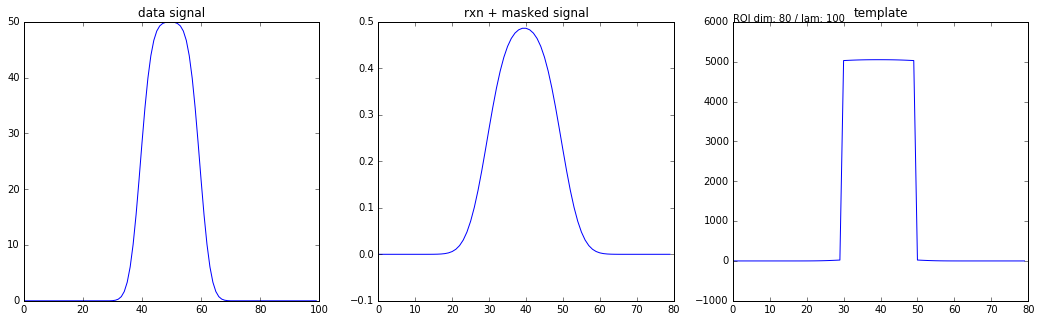

((80, 100), 'MR')
((100, 100), 'Kb')
((80, 80), 'Kx')


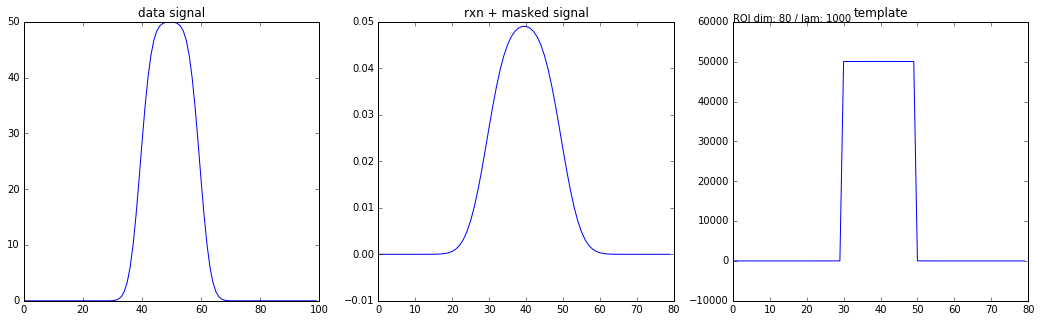

((100, 100), 'Kb')
((100, 100), 'X')
((60, 100), 'M')
((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


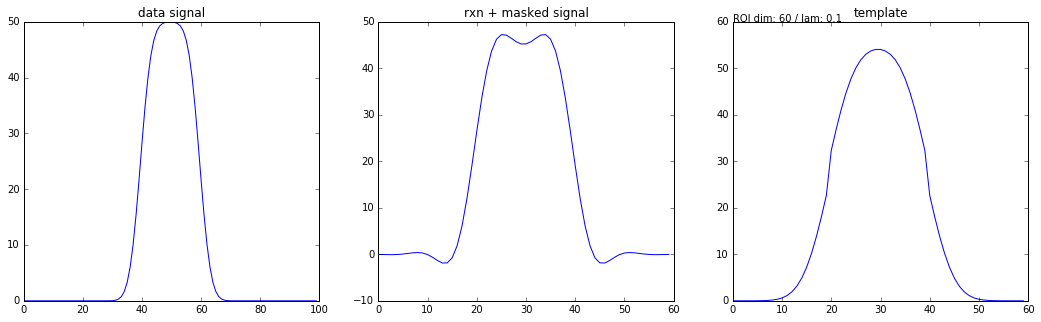

((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


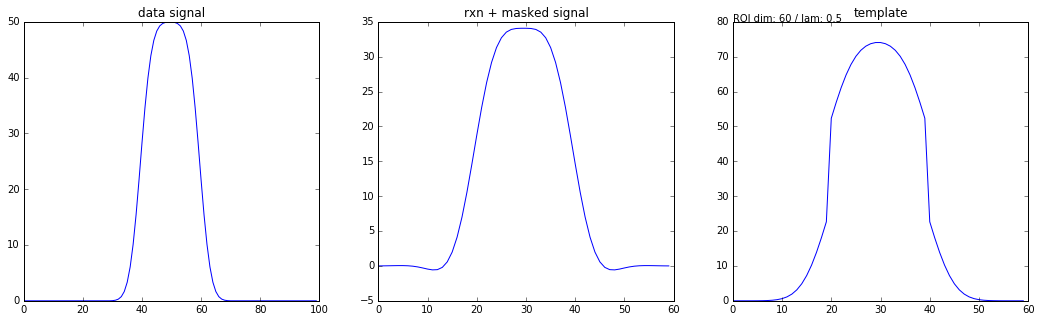

((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


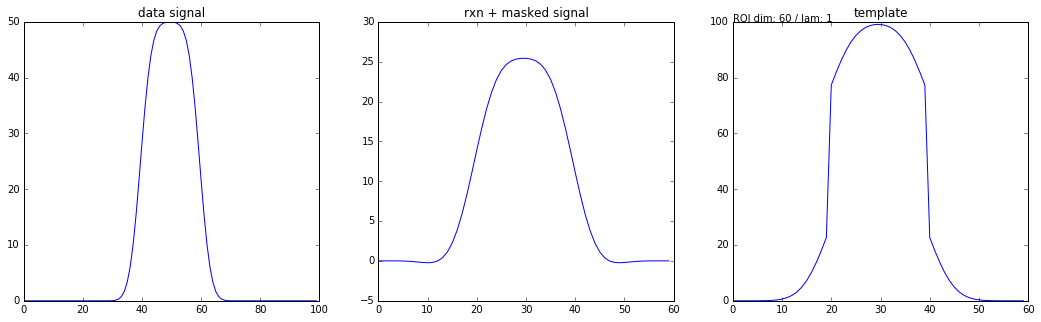

((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


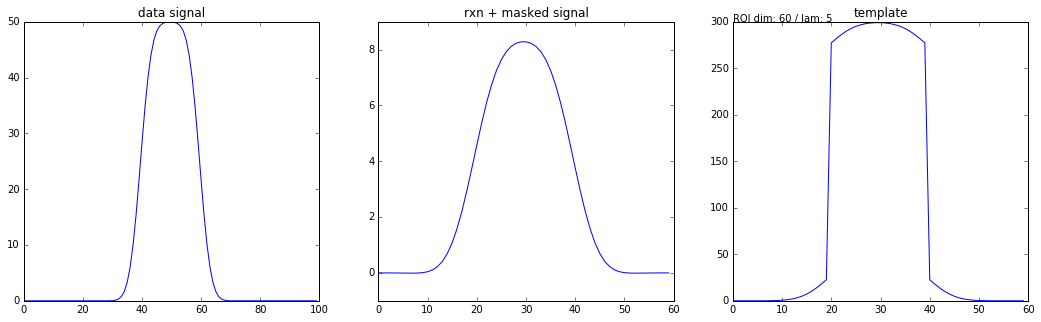

((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


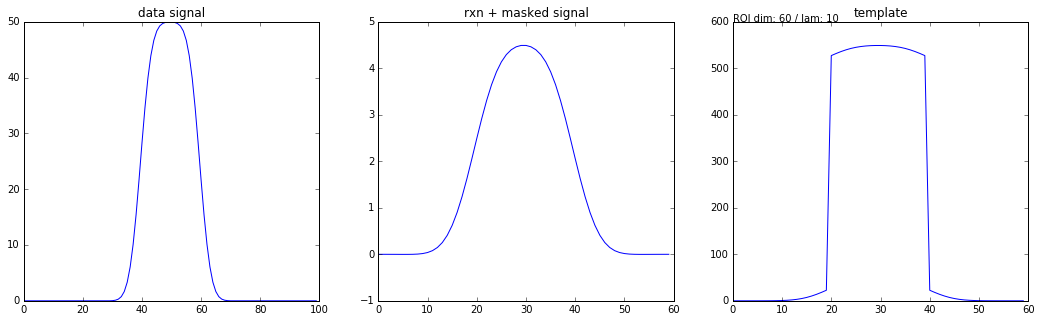

((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


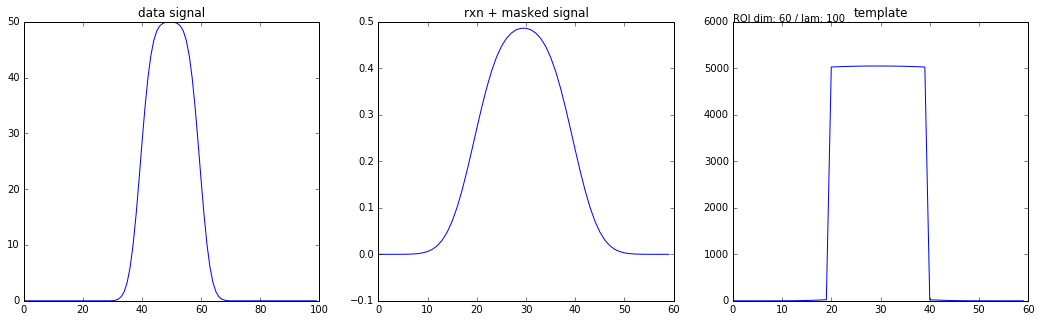

((60, 100), 'MR')
((100, 100), 'Kb')
((60, 60), 'Kx')


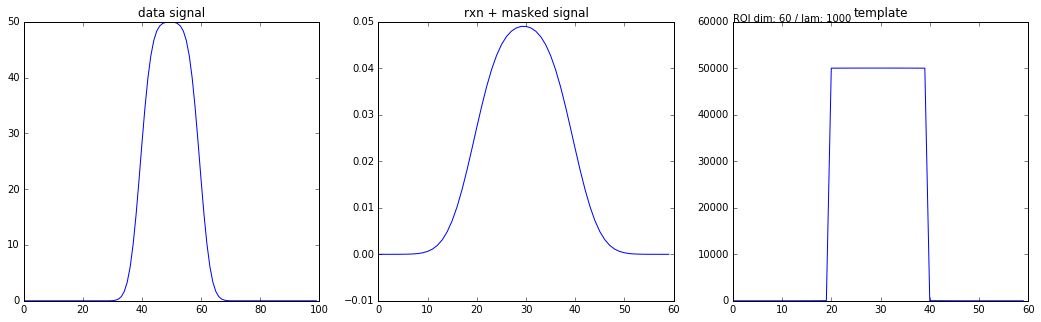

((100, 100), 'Kb')
((100, 100), 'X')
((40, 100), 'M')
((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


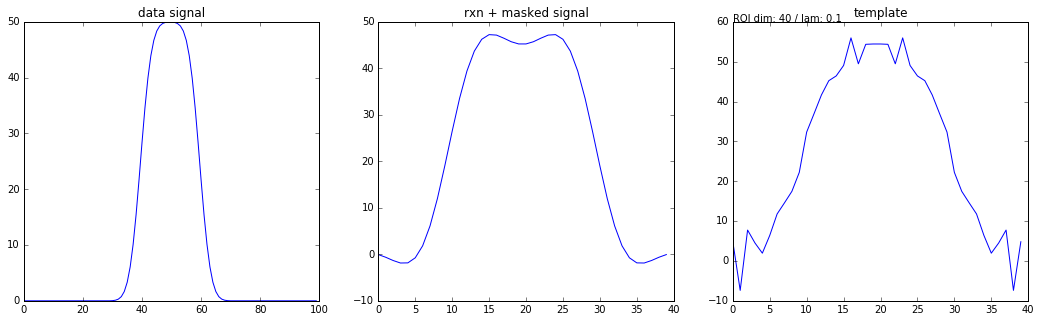

((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


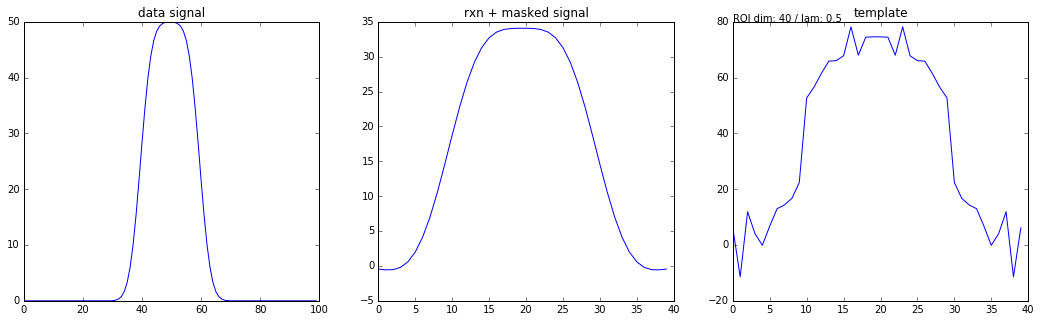

((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


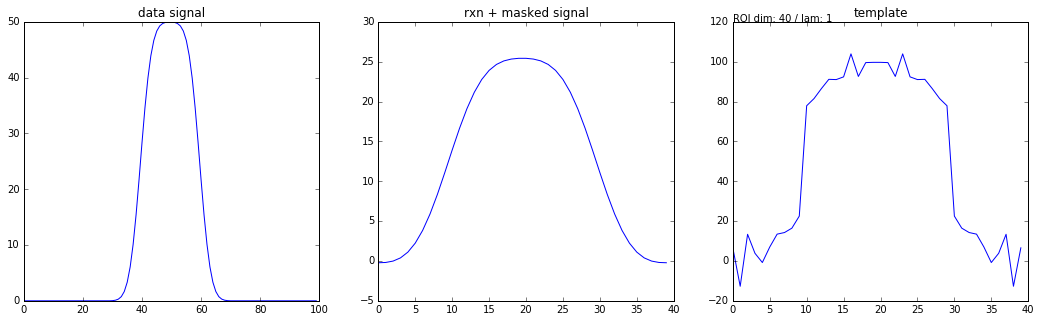

((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


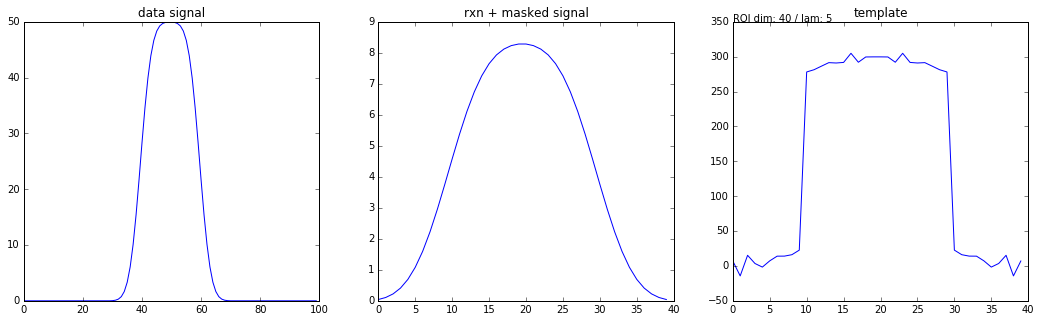

((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


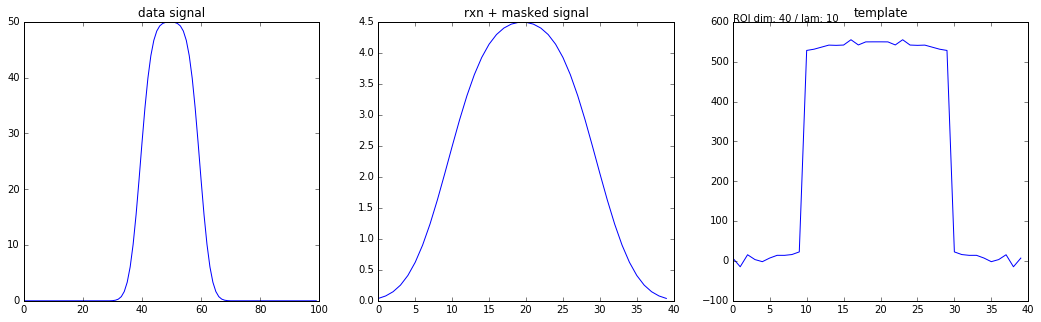

((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


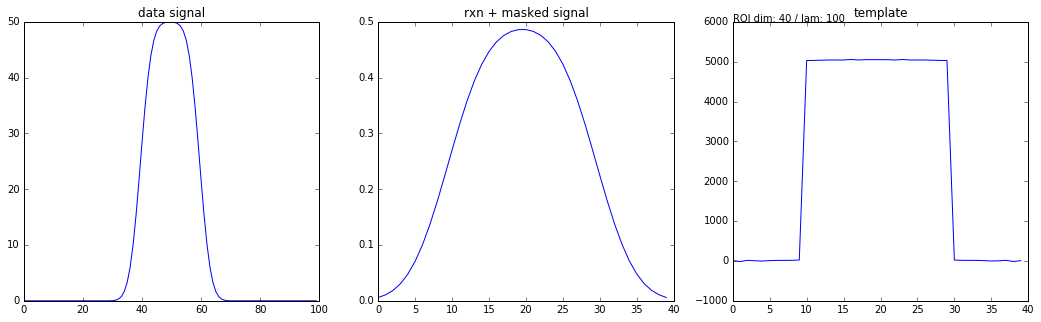

((40, 100), 'MR')
((100, 100), 'Kb')
((40, 40), 'Kx')


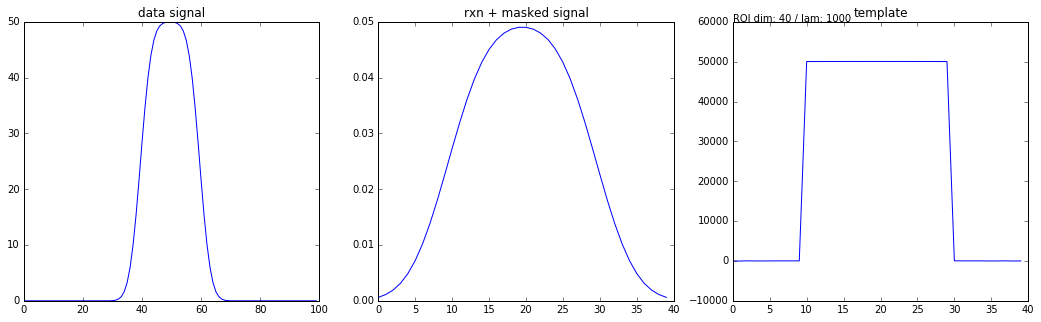

((100, 100), 'Kb')
((100, 100), 'X')
((20, 100), 'M')
((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


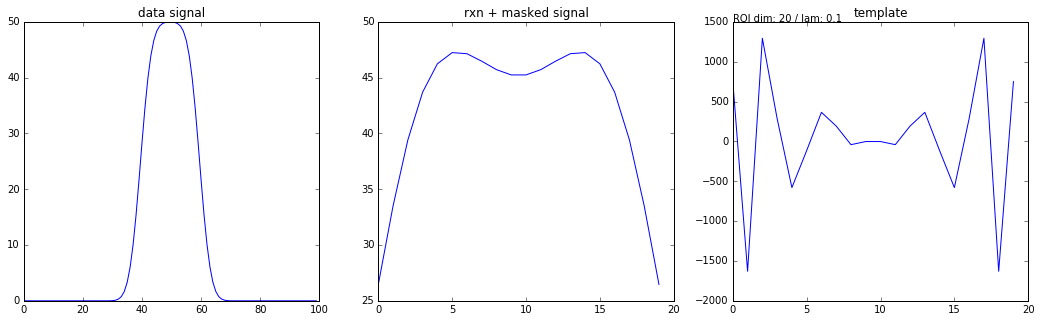

((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


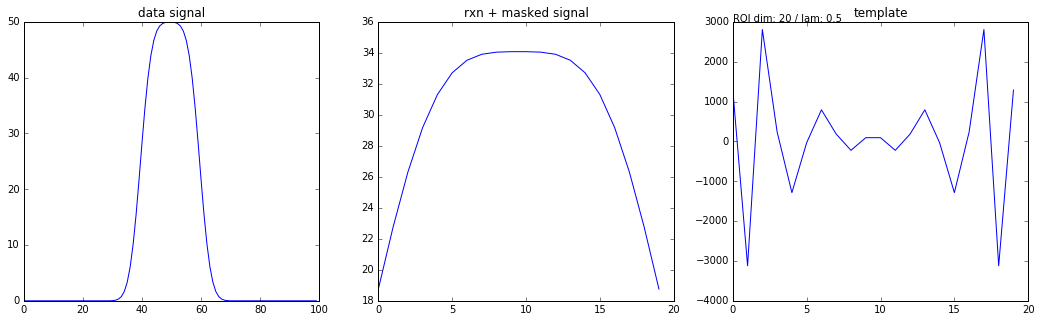

((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


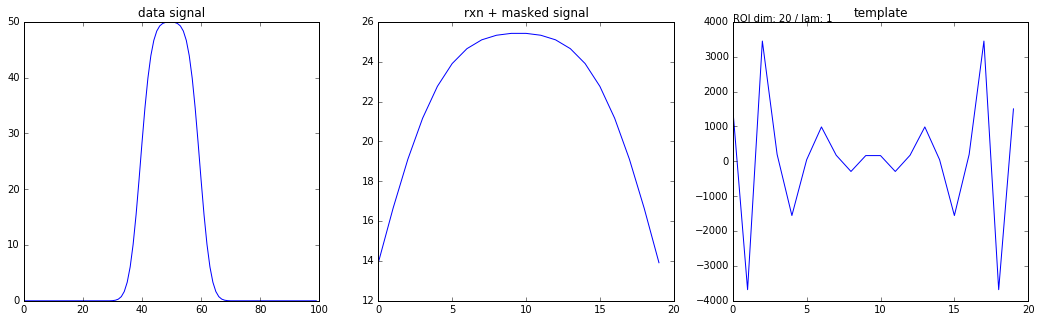

((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


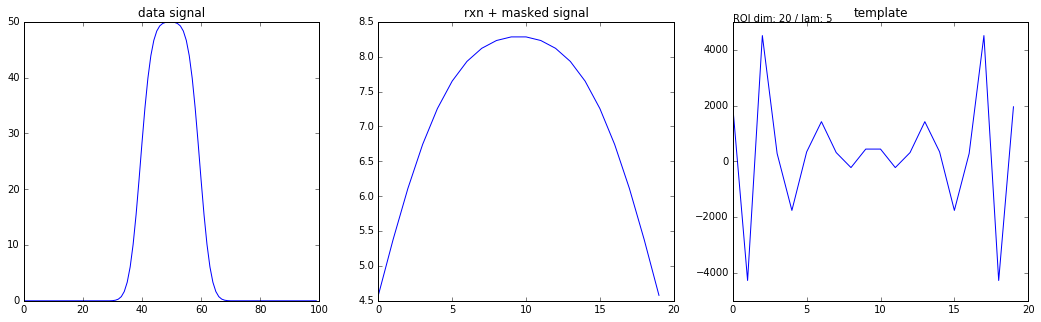

((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


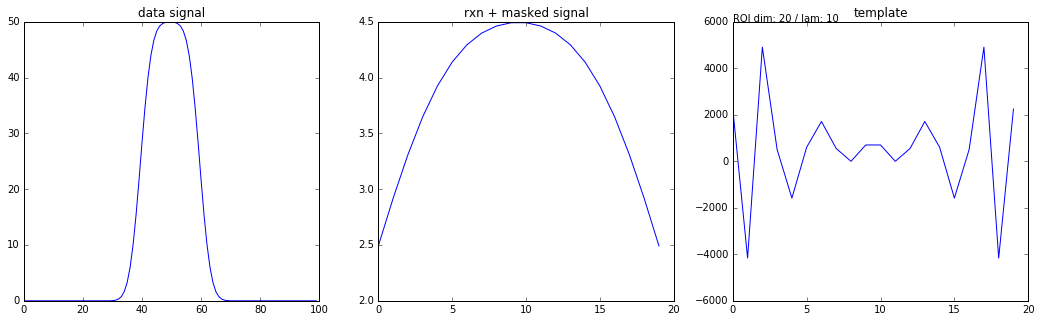

((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


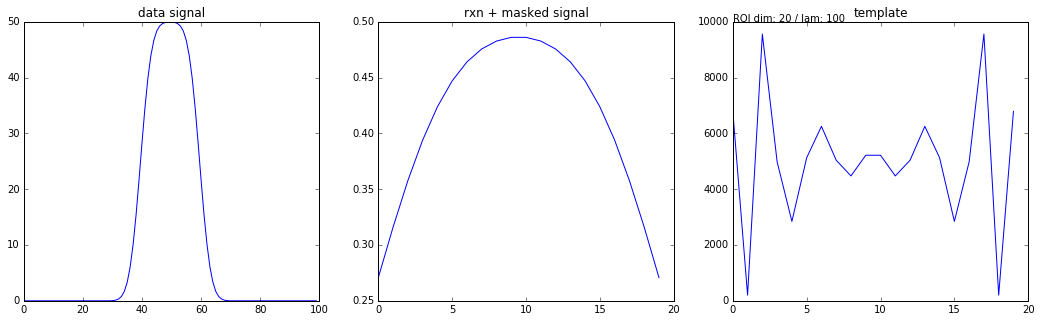

((20, 100), 'MR')
((100, 100), 'Kb')
((20, 20), 'Kx')


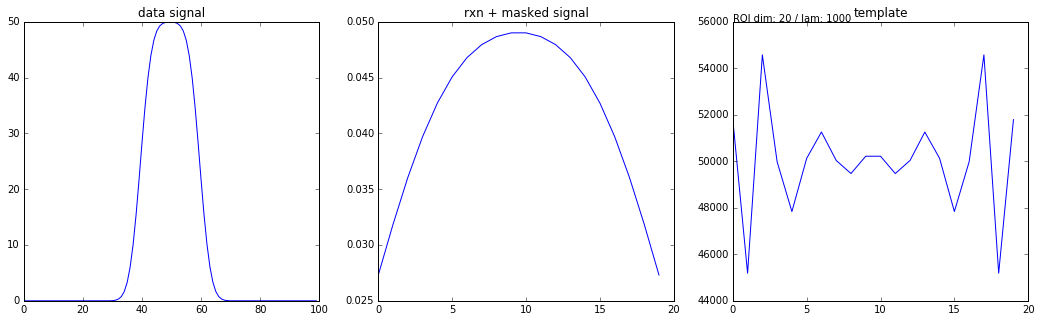

((100, 100), 'Kb')
((100, 100), 'X')
((10, 100), 'M')
((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


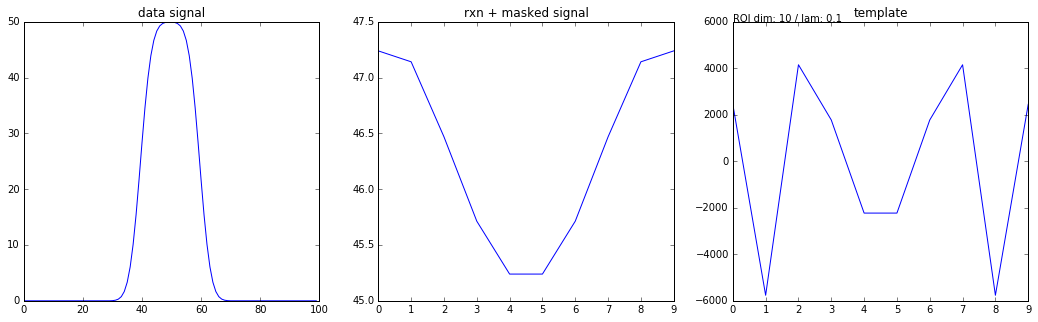

((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


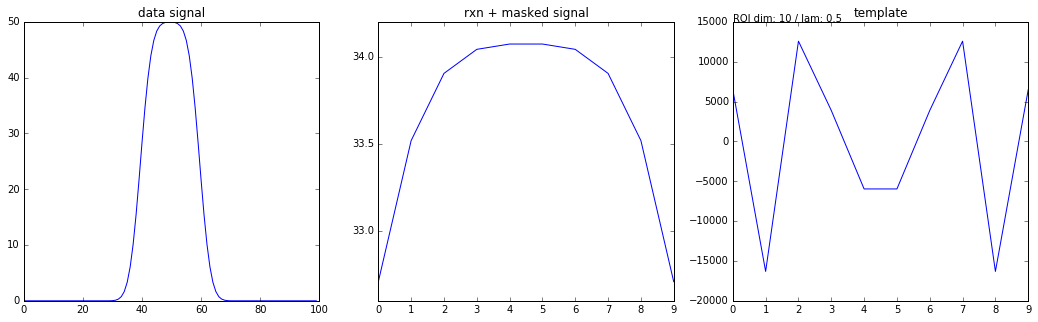

((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


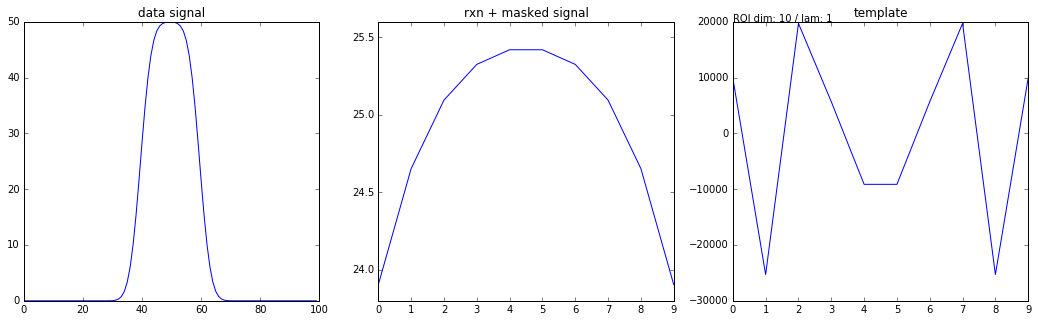

((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


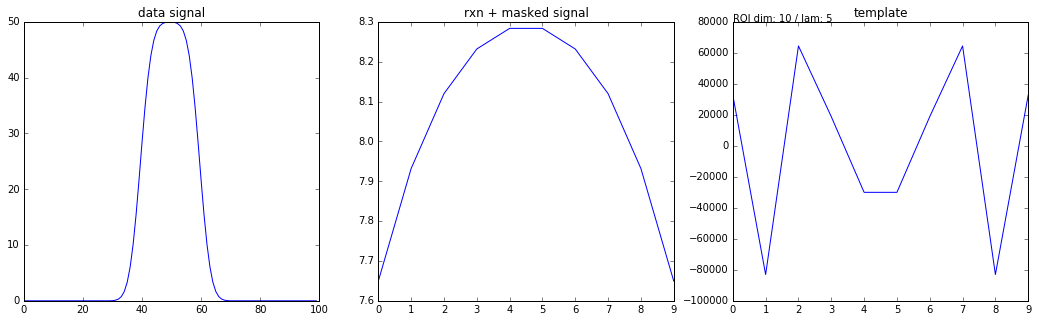

((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


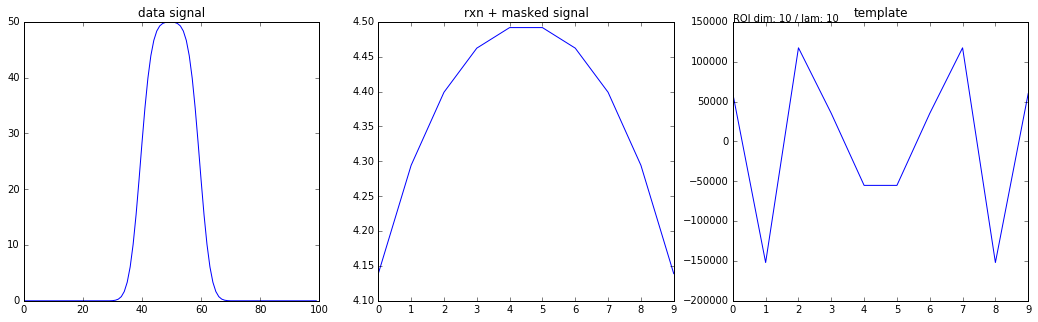

((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


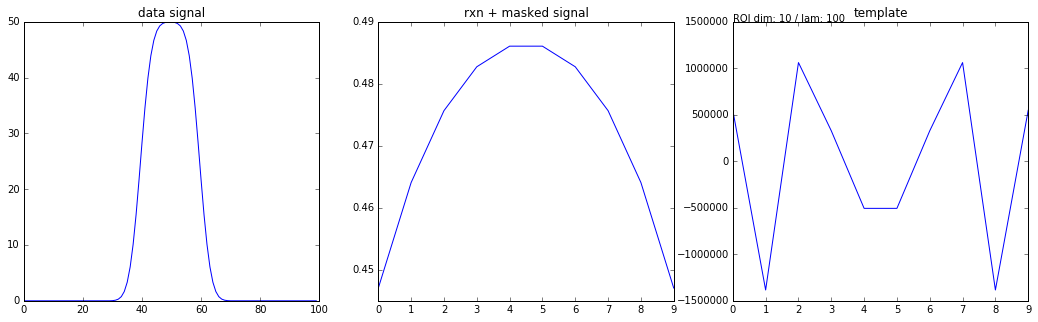

((10, 100), 'MR')
((100, 100), 'Kb')
((10, 10), 'Kx')


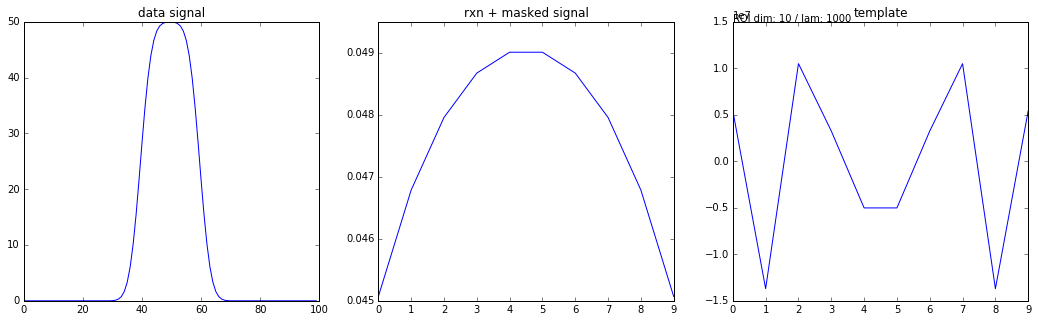

((100, 100), 'Kb')
((100, 100), 'X')
((5, 100), 'M')
((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


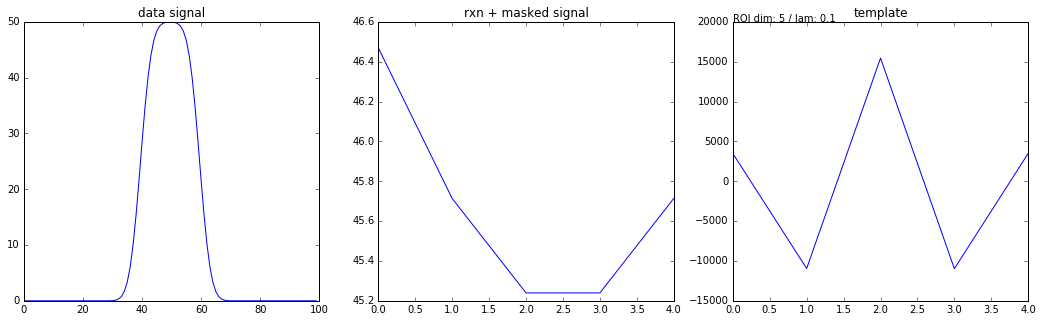

((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


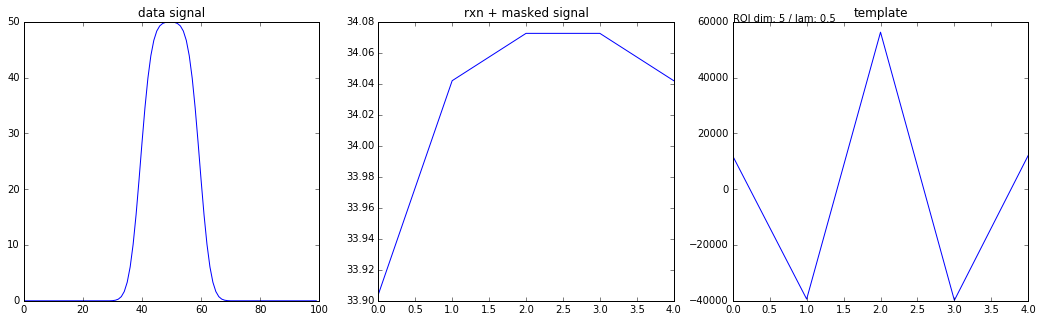

((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


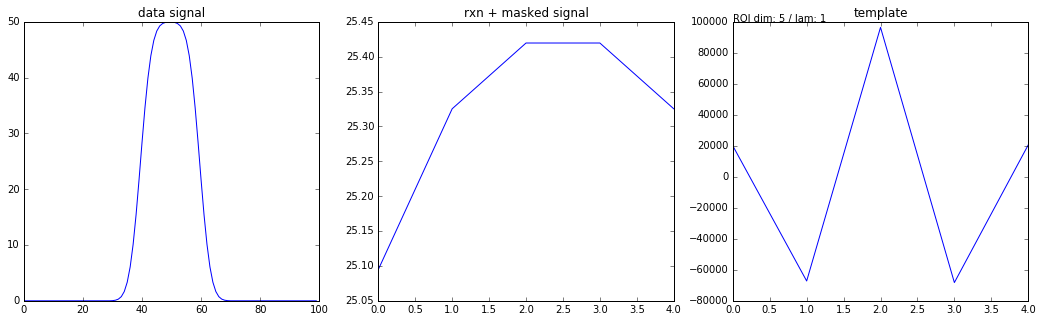

((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


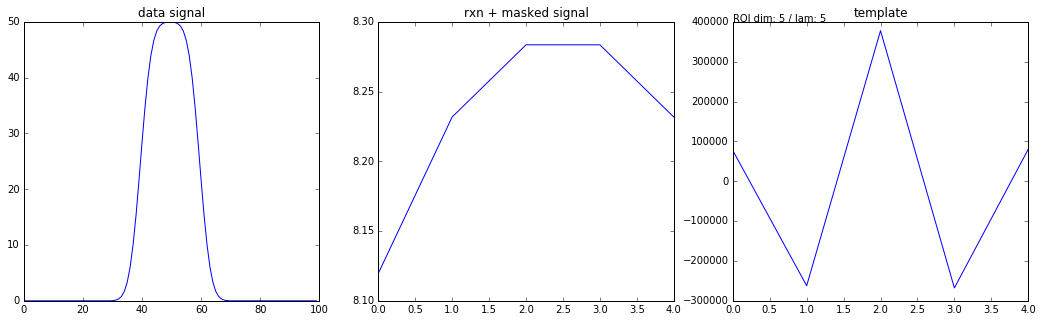

((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


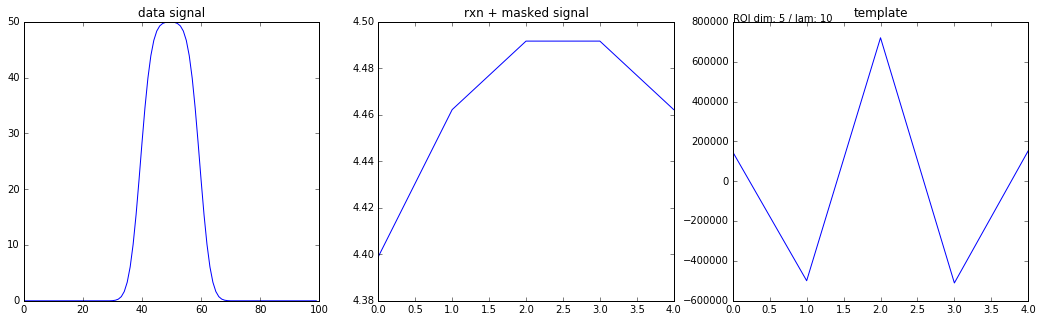

((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


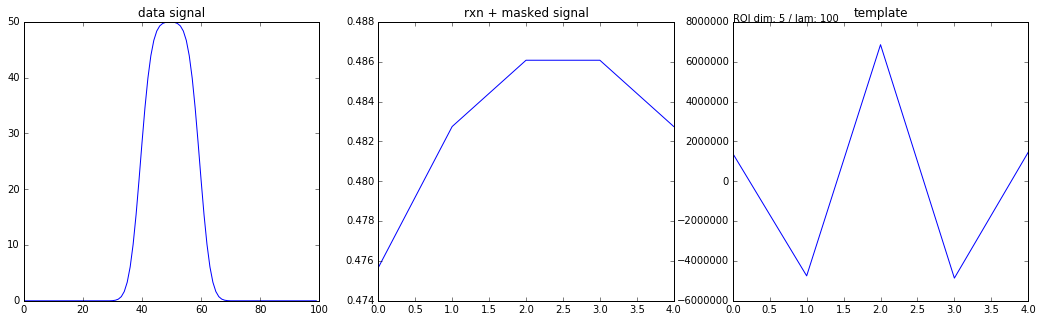

((5, 100), 'MR')
((100, 100), 'Kb')
((5, 5), 'Kx')


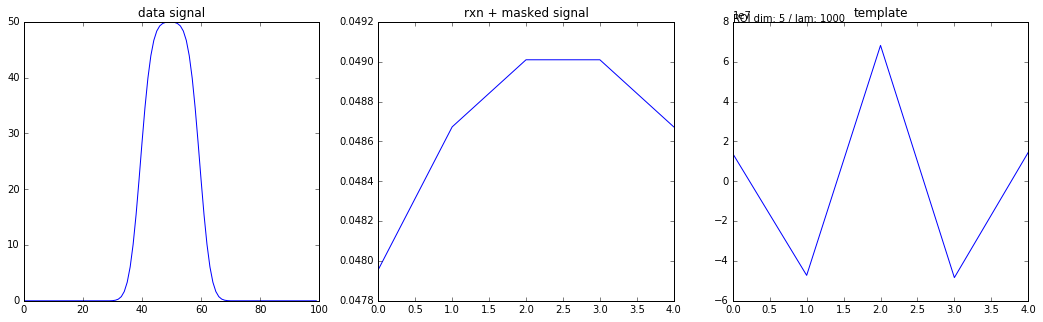

In [11]:
## testing k (i.e., mask ROI size)
K_diag = np.ones(n)    # fixed

kk = [100, 80, 60, 40, 20, 10, 5]
lam = [0.1, 0.5, 1, 5, 10, 100, 1000]

for k in kk:
    
    # generate problem
    Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)
    print(Kb.shape, "Kb")
    print(X.shape, "X")
    print(M.shape, "M")

    # compute reconstruction
    for l in lam:

        R = util.direct_rxn(X=X, lam=l, B=B, sparse=sparse)

        # compute blurred image (data signal)
        sb = X.dot(f)

        fig = plt.figure(figsize=(18,5))
        ax1 = fig.add_subplot(1,3,1)
        plt.plot(sb)        
        ax1.title.set_text("data signal")

        # compute reconstructed / masked image (rxn signal)
        sx = M.dot(R).dot(sb)

        ax2 = fig.add_subplot(1,3,2)
        plt.plot(sx)
        ax2.title.set_text("rxn + masked signal")

        w, Kx, sx = util.direct_solve(Kb=Kb, R=R, M=M, lam=lam, B=B, sb=sb, sparse=True)
        print(Kx.shape, "Kx")
        ax3 = fig.add_subplot(1,3,3)
        ax3.title.set_text("template")
        plt.plot(w)
        txt = "ROI dim: "+str(k)+" / lam: "+str(l)
        plt.text(0,1,txt,transform = ax3.transAxes)
        plt.show()



# large(r) scale problems
---

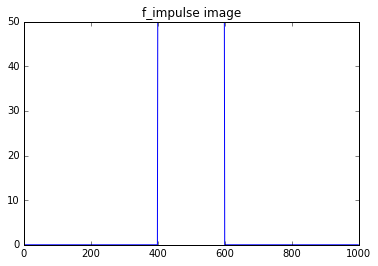

In [12]:
## setup problem
# dimensions
n = 1000   # number of pixels in image space
m = n      # number of pixels in data space
k = 1000   # number of pixels in ROI

# sparsity and regularization
sparse = True
B = iden(n)
lam = 1

# gaussian blur parameters
sigma = 3
t = 10

# create 1D image
f = blur.gen_f(n=n)

## testing CVX packages

In [13]:
import cvxpy as cvx
import cvxopt

## specific packages
from cvxopt import l1regls
from cvxopt import spmatrix
from cvxopt import matrix
from cvxopt import sparse

ImportError: No module named cvxpy

In [ ]:
## generate problem
# generate instance
K_diag = 1.*np.ones(m)
Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)
print(Kb.shape, "Kb")
print(X.shape, "X")
print(M.shape, "M")

# compute blurred image (data signal)
sb = X.dot(f)

### CVXOPT L1REGLS solution to Sean's LSE
---

In [ ]:
Z = (X.T.dot(X) + lam*B.T.dot(B))

t0 = time.time()
A11 = X.T.dot(Kb).dot(X)
A12 = Z.dot(iden(n) - M.T.dot(M))
A21 = A12.T
A22 = np.zeros([n,n])
A = sps.bmat([[A11,A12], [A21,None]])
A = matrix(A.toarray())
# A  = scipy_sparse_to_spmatrix(A)  # unfortunately, KKT solver cannot handle `spmatrix` type

b1 = X.T.dot(sb)
b = np.concatenate([b1, np.zeros(n)])
b = cvxopt.matrix(b)

# phrase as cvx problem
v = cvxopt.l1regls.l1regls(A,b)
u = v[0:n]
u = np.array(u)
w = M.dot(Z).dot(u)
t1 = time.time()
print(t1-t0, "time")

# plot
plt.plot(w)
plt.show()

#### testing size and $M$

In [ ]:
nn = [1e3, 5e3] # 1e4, 5e4, 1e5]
nn = [int(n) for n in nn]
kk = [1, 0.5, 0.25, 0.01]

for n in nn:
    # dimensions -----------------------------------------------------------------------------------
    n = n   # number of pixels in image space
    m = n   # number of pixels in data space
    
    for k in kk:
        k = k*n   # number of pixels in ROI

        # sparsity and regularization
        sparse = True
        B = iden(n)
        lam = 1

        # gaussian blur parameters
        sigma = 3
        t = 10

        # create 1D image
        f = blur.gen_f(n=n)

        ## generate problem 
        # generate instance ----------------------------------------------------------------------------
        K_diag = 1.*np.ones(m)
        Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)

        # compute blurred image (data signal)
        sb = X.dot(f)

        ## solve problem -------------------------------------------------------------------------------
        Z = (X.T.dot(X) + lam*B.T.dot(B))

        t0 = time.time()
        A11 = X.T.dot(Kb).dot(X)
        A12 = Z.dot(iden(n) - M.T.dot(M))
        A21 = A12.T
        A22 = np.zeros([n,n])
        A = sps.bmat([[A11,A12], [A21,None]])
        A = matrix(A.toarray())
        # A  = scipy_sparse_to_spmatrix(A)  # unfortunately, KKT solver cannot handle `spmatrix` type

        b1 = X.T.dot(sb)
        b = np.concatenate([b1, np.zeros(n)])
        b = cvxopt.matrix(b)

        # phrase as cvxopt problem --------------------------------------------------------------------
        v = cvxopt.l1regls.l1regls(A,b)
        u = v[0:n]
        u = np.array(u)
        w = M.dot(Z).dot(u)
        t1 = time.time()
        print(t1-t0, "time")

        # plot
        plt.plot(w)
        plt.title("problem size: "+str(n)+" / ROI size: "+str(k))
        plt.show()


- 1e3: 2.5 seconds
- 5e3: 2 minutes
- 1e4: kernel died

### CVXPY minimum norm solution to Sean's LSE
---

#### testing size ($M$ = $I$)

In [ ]:
nn = [1e3, 5e3, 1e4, 5e4, 1e5] #, 5e4, 1e5]
nn = [int(n) for n in nn]

for n in nn:
    # dimensions -----------------------------------------------------------------------------------
    n = n   # number of pixels in image space
    m = n   # number of pixels in data space
    k = n   # number of pixels in ROI

    # sparsity and regularization
    sparse = True
    B = iden(n)
    lam = 1

    # gaussian blur parameters
    sigma = 3
    t = 10

    # create 1D image
    f = blur.gen_f(n=n)
    
    ## generate problem 
    # generate instance ----------------------------------------------------------------------------
    K_diag = 1.*np.ones(m)
    Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)

    # compute blurred image (data signal)
    sb = X.dot(f)
    
    ## solve problem -------------------------------------------------------------------------------

    Z = (X.T.dot(X) + lam*B.T.dot(B))

    t0 = time.time()
    A11 = X.T.dot(Kb).dot(X)
    A12 = Z.dot(iden(n) - M.T.dot(M))
    A21 = A12.T
    A22 = np.zeros([n,n])
    A = sps.bmat([[A11,A12], [A21,None]])
    print(A.shape)
    
    b1 = X.T.dot(sb)
    b = np.concatenate([b1, np.zeros(n)])
    print(b.shape)

    # phrase as cvxopt problem --------------------------------------------------------------------
    
    v = cvx.Variable(2*n)
    cost = cvx.norm( cvx.mul_elemwise(1., A*v) - b )
    objective = cvx.Minimize( cvx.norm(v) + cost )
#     constraints = [v[0:n] >= 0]
    prob = cvx.Problem(objective)
    result = prob.solve()

    u = v.value[0:n]
    u = np.array(u)
    w = M.dot(Z).dot(u)

    t1 = time.time()
    print(t1-t0, "time")
    
    # plot
    plt.plot(w)
    plt.title("problem size: "+str(n))
    plt.show()


### CG solution to Sean's LSE
---

#### testing size ($M$ = $I$)

In [ ]:
nn = [1e3, 5e3, 1e4] #, 5e4, 1e5] #, 5e4, 1e5]
nn = [int(n) for n in nn]

for n in nn:
    # dimensions -----------------------------------------------------------------------------------
    n = n   # number of pixels in image space
    m = n   # number of pixels in data space
    k = 100   # number of pixels in ROI

    # sparsity and regularization
    sparse = True
    B = iden(n)
    lam = 1

    # gaussian blur parameters
    sigma = 3
    t = 10

    # create 1D image
    f = blur.gen_f(n=n)
    
    ## generate problem 
    # generate instance ----------------------------------------------------------------------------
    K_diag = 1.*np.ones(m)
    Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)

    # compute blurred image (data signal)
    sb = X.dot(f)
    
    ## solve problem -------------------------------------------------------------------------------

    Z = (X.T.dot(X) + lam*B.T.dot(B))

    t0 = time.time()
    A11 = X.T.dot(Kb).dot(X)
    A12 = Z.dot(iden(n) - M.T.dot(M))
    A21 = A12.T
    A22 = np.zeros([n,n])
    A = sps.bmat([[A11,A12], [A21,None]])
    print(A.shape)
    
    b1 = X.T.dot(sb)
    b = np.concatenate([b1, np.zeros(n)])
    print(b.shape)
    
    cgs = optimize.ConjugateGradientsSolver(A=A, b=b)
    v = cgs.solve()
    u = v[0:n]
    u = np.array(u)
    w = M.dot(Z).dot(u)

    t1 = time.time()
    print(t1-t0, "time")
    
    # plot
    plt.plot(w)
    plt.title("problem size: "+str(n))
    plt.show()


### CVXOPT solution to implicit formulation
---